# Task 1- Prediction using Supervised ML

## Author: Sourabh Suman

### Problem Statement:

- Predict the percentage of an student based on the no. of study hours.
- What will be predicted score if a student studies for 9.25 hrs/ day?

### Importing all the libraries required in this task

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Loading Data

In [2]:
url="https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
data= pd.read_csv(url)
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


### Exploratory Data Analysis

In [3]:
#dimensionality of dataframe
data.shape

(25, 2)

In [4]:
#Generating descriptive analysis
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [5]:
#correlation between variables
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


### Data Distribution

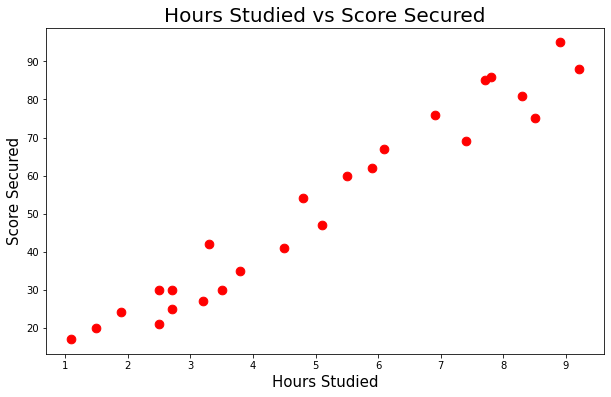

In [87]:
#plotting data distribution
plt.figure(figsize=(10,6))
x=data.iloc[:,:-1].values
y=data.iloc[:,-1].values
plt.title('Hours Studied vs Score Secured',fontsize=20)
plt.xlabel('Hours Studied', fontsize=15)
plt.ylabel('Score Secured', fontsize=15)
plt.scatter(x,y,s=75,color='red')
plt.show()

## Simple Linear Regression 

In [88]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

### Creating Testing and Training Set

In [89]:
#splitting the data into training and testing set
X_train, X_test, y_train, y_test= train_test_split(x,y,test_size=0.2, random_state=0)

### Plotting distribution of training and testing data

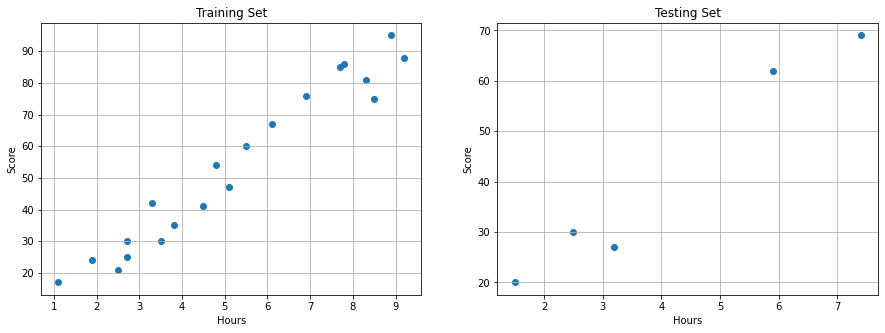

In [90]:
plt.figure(figsize=(15,5))

#plot 1
plot1_x = X_train
plot1_y = y_train
plt.subplot(1, 2, 1)
plt.scatter(plot1_x,plot1_y)
plt.title("Training Set")
plt.xlabel('Hours')
plt.ylabel('Score')
plt.grid()


#plot 2:
plot2_x = X_test
plot2_y = y_test
plt.subplot(1, 2, 2)
plt.scatter(plot2_x,plot2_y)
plt.title("Testing Set")
plt.xlabel('Hours')
plt.ylabel('Score')
plt.grid()


plt.show()

### Modeling and fitting

In [101]:
model=LinearRegression()
model.fit(X_train,y_train)
print(f'coefficient: {model.coef_}')
print(f'Intercept: {model.intercept_}')

coefficient: [9.91065648]
Intercept: 2.018160041434683


### Plotting Regression

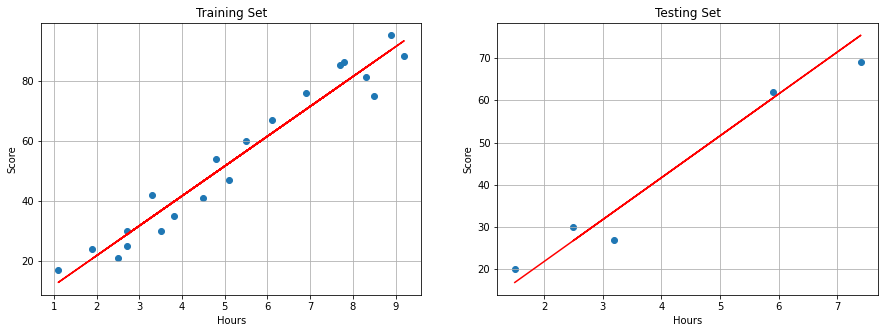

In [105]:
 plt.figure(figsize=(15,5))

#plot 1
plot1_x = X_train
plot1_y = y_train
plt.subplot(1, 2, 1)
plt.scatter(plot1_x,plot1_y)
plt.plot(X_train, model.coef_*X_train+model.intercept_, '-r')
plt.title("Training Set")
plt.xlabel('Hours')
plt.ylabel('Score')
plt.grid()


#plot 2:
plot2_x = X_test
plot2_y = y_test
plt.subplot(1, 2, 2)
plt.scatter(plot2_x,plot2_y)
plt.plot(X_test, model.coef_*X_test+model.intercept_, '-r')
plt.title("Testing Set")
plt.xlabel('Hours')
plt.ylabel('Score')
plt.grid()


plt.show()

### Making Predictions

In [107]:
y_pred=model.predict(X_test)
print(y_pred)

[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


In [110]:
pd.DataFrame({'Hours': X_test[:,0],'Actual Score':y_test,'Predicted Score':y_pred})

,Hours,Actual Score,Predicted Score
0,1.5,20,16.884145
1,3.2,27,33.732261
2,7.4,69,75.357018
3,2.5,30,26.794801
4,5.9,62,60.491033


### Evaluation

In [111]:
print(f'Mean Absolute Error(MAE): {metrics.mean_absolute_error(y_test, y_pred)}')
print(f'Residual Sum of Squares(MSE): {metrics.mean_squared_error(y_test, y_pred)}')
print(f'R2-Score: {metrics.r2_score(y_test, y_pred)}')

Mean Absolute Error(MAE): 4.183859899002975
Residual Sum of Squares(MSE): 21.5987693072174
R2-Score: 0.9454906892105356


### What will be predicted score if a student studies for 9.25 hrs/ day?

In [112]:
hours = 9.25
score = model.predict([[hours]]).astype(int)
pd.DataFrame({'Hours': hours, 'Predicted Score': score})

,Hours,Predicted Score
0,9.25,93


#### If a student studies for 9.25 hrs/day, the Score will be 93 as per this model.

### THANK YOU!